The `%matplotlib` magic command is used here to enable plotting in the current notebook. The inline backend will embed plots inside the notebook.

In [1]:
%matplotlib inline

#### Import necessary modules

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#### Import the Butler roof netcdf file from the THREDDS server using the xarray package

In [3]:
ds = xr.open_dataset('http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/butler.nc')
#ds = xr.open_dataset('../Data/butler_c8ee_04d0_8183.nc')

#### List the variables in the netcdf file

In [4]:
print ds

<xarray.Dataset>
Dimensions:                  (time: 52296)
Coordinates:
    lat                      float64 ...
    lon                      float64 ...
    station_name             |S64 ...
  * time                     (time) datetime64[ns] 2011-03-01T18:00:00 ...
Data variables:
    AirTC_2_Avg              (time) float64 ...
    AirTC_Avg                (time) float64 ...
    Albedo_1_Avg             (time) float64 ...
    Albedo_Avg               (time) float64 ...
    CmCIR_Avg                (time) float64 ...
    CmGIR_Avg                (time) float64 ...
    DnTot_Avg                (time) float64 ...
    IR01DnCo_Avg             (time) float64 ...
    IR01Dn_Avg               (time) float64 ...
    IR01UpCo_Avg             (time) float64 ...
    IR01Up_Avg               (time) float64 ...
    LPO2Dn_Avg               (time) float64 ...
    Max_Run_Tot_mm_24hr_Max  (time) float64 ...
    Max_Run_Tot_mm_2hr_Max   (time) float64 ...
    NR01TC_Avg               (time) float64 

#### Define short names
Note the switched labels for green and conventional roof measurements of radiation variables!!

In [5]:
names = {'AirTC_Avg': 'Air Temperature (conventional roof - degrees C)',
         'AirTC_2_Avg': 'Air Temperature (green roof - degrees C)',
         'RH': 'Relative Humidity (conventional Roof)',
         'RH_2': 'Relative Humidity (green roof)',
         'CmCIR_Avg': 'Infrared Skin Temperature (conventional roof - degrees C)',
         'CmGIR_Avg': 'Infrared Skin Temperature (green roof -  degrees C)',
         'Albedo_Avg': ' Albedo (conventional roof)',
         'Albedo_1_Avg': 'Albedo (green roof)',
         'SR01Up_Avg': 'DOWNWELLING solar radiation !! (Watts/m2)',
         'SR01Dn_Avg': 'UPWELLING solar radiation !! (Watts/m2)',
         'IR01DnCo_Avg': 'UPWELLING longwave radiation !! (Watts/m2)',
         'IR01UpCo_Avg': 'DOWNWELLING longwave radiation !! (Watts/m2)'}
print names

{'AirTC_2_Avg': 'Air Temperature (green roof - degrees C)', 'IR01UpCo_Avg': 'DOWNWELLING longwave radiation !! (Watts/m2)', 'RH_2': 'Relative Humidity (green roof)', 'AirTC_Avg': 'Air Temperature (conventional roof - degrees C)', 'Albedo_Avg': ' Albedo (conventional roof)', 'Albedo_1_Avg': 'Albedo (green roof)', 'SR01Dn_Avg': 'UPWELLING solar radiation !! (Watts/m2)', 'CmGIR_Avg': 'Infrared Skin Temperature (green roof -  degrees C)', 'CmCIR_Avg': 'Infrared Skin Temperature (conventional roof - degrees C)', 'RH': 'Relative Humidity (conventional Roof)', 'IR01DnCo_Avg': 'UPWELLING longwave radiation !! (Watts/m2)', 'SR01Up_Avg': 'DOWNWELLING solar radiation !! (Watts/m2)'}


#### Create dataframe and summarize temperature and relative humidity

In [6]:
Temp_and_RH_ds = ds[['AirTC_Avg', 'AirTC_2_Avg', 'RH','RH_2', 'CmCIR_Avg', 'CmGIR_Avg']]
newdf = Temp_and_RH_ds.to_dataframe().drop(['lon', 'lat', 'station_name'], axis=1)
newdf.describe(percentiles=[.1, .25, .5, .75, .9])

,AirTC_Avg,AirTC_2_Avg,RH,RH_2,CmCIR_Avg,CmGIR_Avg
count,52296.000000,52296.000000,52296.000000,52296.000000,52296.000000,52296.000000
mean,13.108815,13.208794,67.277943,64.320545,13.042238,13.280516
std,10.274974,10.264273,25.354186,20.924455,14.507288,11.881347
min,-17.900000,-17.930000,10.600000,10.700000,-25.260000,-22.150000
10%,-0.392000,-0.302000,36.720000,35.395000,-4.500000,-2.022000
25%,4.968750,5.105750,48.910000,47.690000,2.160000,4.117500
50%,13.500000,13.630000,65.540000,64.300000,12.120000,13.350000
75%,21.260000,21.340000,83.500000,82.600000,21.390000,21.420000
90%,26.460000,26.520000,95.100000,92.900000,33.330000,28.945000
max,40.770000,39.410000,160.700000,100.000000,59.620000,50.180000


#### Create dataframe and summarize radiation

In [7]:
rad_ds = ds[['SR01Up_Avg', 'SR01Dn_Avg', 'IR01DnCo_Avg', 'IR01UpCo_Avg', 'Albedo_Avg', 'Albedo_1_Avg']]
raddf = rad_ds.to_dataframe().drop(['lon', 'lat', 'station_name'], axis=1)
raddf.describe(percentiles=[.1, .25, .5, .75, .9])

,SR01Up_Avg,SR01Dn_Avg,IR01DnCo_Avg,IR01UpCo_Avg,Albedo_Avg,Albedo_1_Avg
count,52296.000000,52296.000000,52296.000000,52296.000000,50778.000000,50768.000000
mean,170.660869,47.948167,391.387024,333.674608,0.235872,0.171142
std,259.190850,73.452840,73.228675,63.759127,0.447614,0.407414
min,-9.870000,-2.062000,228.200000,153.400000,0.000000,0.000000
10%,-3.745500,0.513000,305.800000,244.050000,0.000000,0.000000
25%,-2.108000,1.101000,334.600000,286.800000,0.000000,0.039000
50%,6.292000,3.121500,383.700000,338.300000,0.225000,0.135000
75%,282.025000,74.315000,433.100000,384.900000,0.281000,0.180000
90%,615.250000,169.300000,495.750000,416.400000,0.422000,0.244000
max,1063.000000,600.300000,643.300000,494.200000,15.020000,32.010000


#### Time series of air temperature and skin temperature for conventional roof

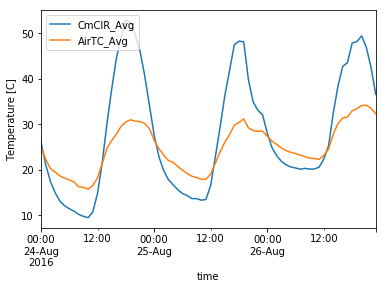

In [8]:
newdf['CmCIR_Avg'].loc[slice('2016-08-24', '2016-08-26')].plot()
newdf['AirTC_Avg'].loc[slice('2016-08-24', '2016-08-26')].plot()
plt.title("")
plt.ylabel('Temperature [C]')
plt.legend(loc='upper left');

#### Show monthly boxplots for the entire time series

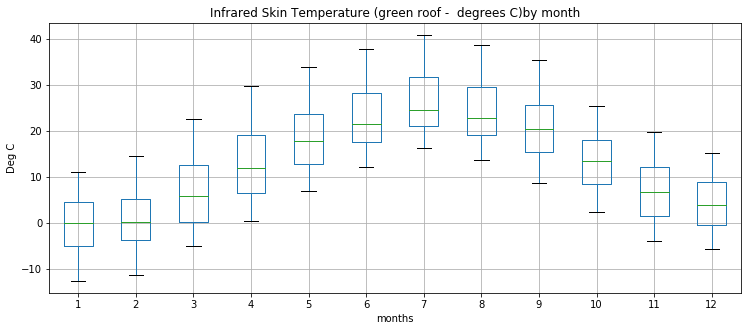

In [9]:
var = 'CmGIR_Avg'
newdf.boxplot(column=var, by=newdf.index.month, whis=[5, 95], sym='', figsize=(12, 5))
plt.xlabel('months')
plt.ylabel(ds[var].units)
plt.title(names[var]+'by month')
plt.suptitle('');

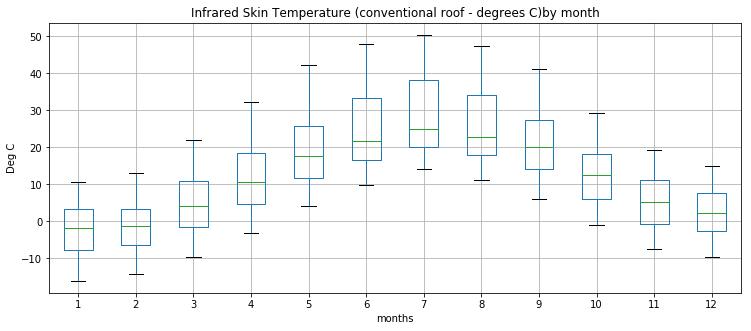

In [10]:
var = 'CmCIR_Avg'
newdf.boxplot(column=var, by=newdf.index.month, whis=[5, 95], sym='', figsize=(12, 5))
plt.xlabel('months')
plt.ylabel(ds[var].units)
plt.title(names[var]+'by month')
plt.suptitle('');

#### Skin temperature - air temperature for conventional roof

In [11]:
newdf['T_diff'] = newdf['CmCIR_Avg'] - newdf['AirTC_Avg']

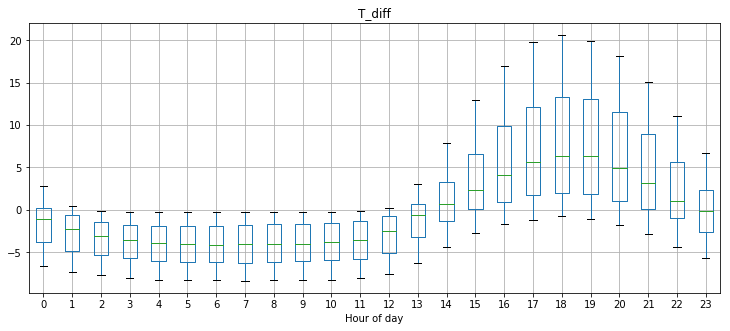

In [12]:
var = 'T_diff'
newdf.boxplot(column=var, by=newdf.index.hour, whis=[5, 95], sym='', figsize=(12, 5))
plt.xlabel('Hour of day')
plt.suptitle('');

#### Skin temperature - air temperature for green roof

In [13]:
newdf['T_diffG'] = newdf['CmGIR_Avg'] - newdf['AirTC_2_Avg']

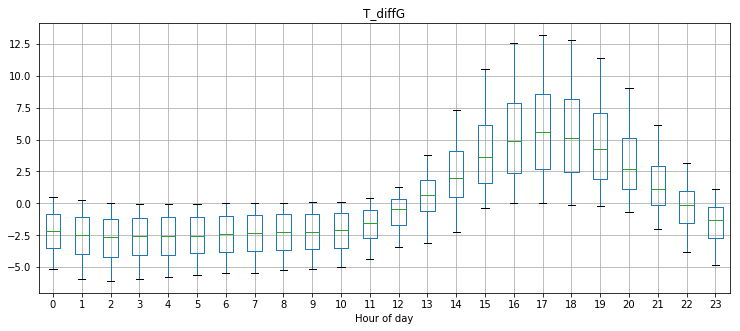

In [14]:
var = 'T_diffG'
newdf.boxplot(column=var, by=newdf.index.hour, whis=[5, 95], sym='', figsize=(12, 5))
plt.xlabel('Hour of day')
plt.suptitle('');

#### Plot the diurnal cycle for warm seasons

In [15]:
newdf_warm = newdf[(newdf.index.month >= 6) & (newdf.index.month <=8)]

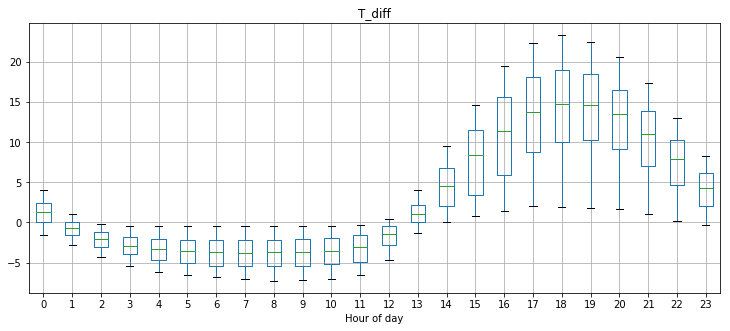

In [16]:
var = 'T_diff'
newdf_warm.boxplot(column=var, by=newdf_warm.index.hour, whis=[5, 95], sym='', figsize=(12, 5))
plt.xlabel('Hour of day')
plt.suptitle('');

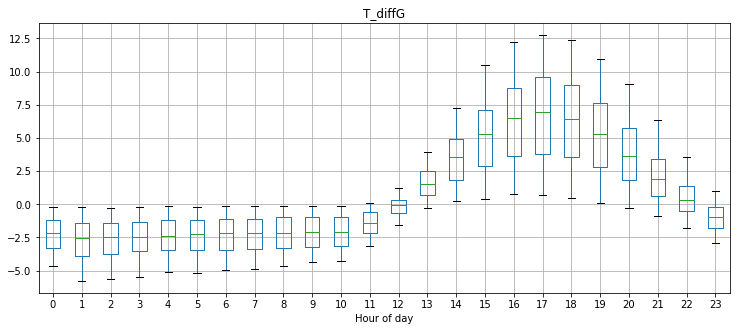

In [17]:
var = 'T_diffG'
newdf_warm.boxplot(column=var, by=newdf_warm.index.hour, whis=[5, 95], sym='', figsize=(12, 5))
plt.xlabel('Hour of day')
plt.suptitle('');

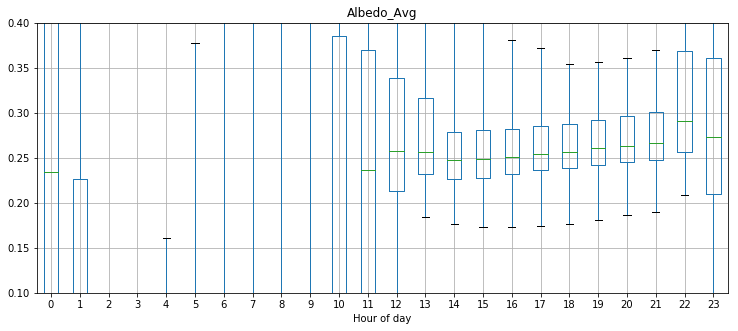

In [18]:
# Albedo of Conventional Roof
var = 'Albedo_Avg'
raddf.boxplot(column=var, by=raddf.index.hour, whis=[5, 95], sym='', figsize=(12, 5))
plt.xlabel('Hour of day')
plt.ylim((0.1, 0.4))
plt.suptitle('');

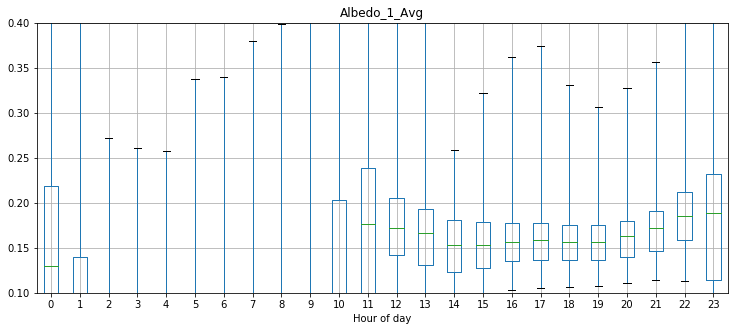

In [19]:
# Albedo of Green Roof
var = 'Albedo_1_Avg'
raddf.boxplot(column=var, by=raddf.index.hour, whis=[5, 95], sym='', figsize=(12, 5))
plt.xlabel('Hour of day')
plt.ylim((0.1, 0.4))
plt.suptitle('');